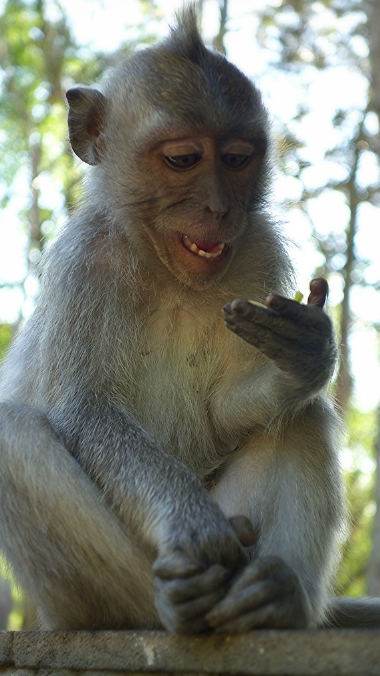

## Disclaimer! This kernel is only for educational purposes and made for fun therefor the content of the kernel should not be taken to seriously! 

In [ ]:
import numpy as np 
import pandas as pd 

import os
print(os.listdir("../input"))
from glob import glob
import random
import cv2
import matplotlib.pylab as plt
import random as rand
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization, Input
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from pathlib import Path
from keras.optimizers import Adam,RMSprop,SGD

# Loading data

In [ ]:
df = pd.read_csv("../input/10-monkey-species/monkey_labels.txt")
df.head()

# Image viewing

In [ ]:
image_path = "../input/10-monkey-species/training/training/"
images_dict = {}


for image in os.listdir(image_path):
    folder_path = os.path.join(image_path, image)
    images = os.listdir(folder_path)
    
    images_dict[image] = [folder_path, image]
    img_idx = rand.randint(0,len(image)-1)
    image_img_path = os.path.join(image_path, image, images[img_idx])
    #printing image
    img = cv2.imread(image_img_path)
    #print(image_img_path) # to get the path of one image with the .jpg number; uncommen this line
    plt.imshow(img);

# Preprocessing

In [ ]:
height=150
width=150
batch_size=32     
seed=1337

train_dir = Path('../input/10-monkey-species/training/training/')
test_dir = Path('../input/10-monkey-species/validation/validation/')

# Training generator first step rescale and gives more images in different angels and zoom range and even flipping the image
train_datagen = ImageDataGenerator(rotation_range = 30       
                                   ,rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


train_generator = train_datagen.flow_from_directory(train_dir, #load data 
                                                    target_size=(height,width), #what size image we want
                                                    batch_size=batch_size,  #how many images to read at the time 
                                                    seed=seed,
                                                    class_mode='categorical') #we are classifing images into different categories


# Test generator we do the same as in train_generator without the rotation on images. 
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  class_mode='categorical')

# Add first layer

In [ ]:
model = Sequential()
model.add(Conv2D(12, kernel_size=(3,3),
                 activation='relu',
                 input_shape=(150,150,3)))

# Add the remaining layers

In [ ]:
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))                    #dropout means how offent to drop nodes, to make new connections
model.add(Dense(256,activation='relu'))    #relu means rectified linear unit and is y=max(0, x) and 'Dense' means how dense you want the model in the given activation
model.add(Dense(10, activation='softmax')) #softmax turns it into properbelities

# Compile Your Model & Fit The Model

In [ ]:
model.compile(optimizer = 'adam',loss="categorical_crossentropy", metrics=["accuracy"])   #you can change (optimizer = 'adam') to (Adam(lr=0.0001)) here is lr=learning rate
# compile tells tenserflow how to update the dense connections, when we are training on the data
fitting_model = model.fit_generator(train_generator,
                    steps_per_epoch = 1097//batch_size, #just a calulation (train size/batch size) also how many pictures we want to load each time
                    validation_data = test_generator, 
                    validation_steps = 272//batch_size, #just a calulation (validation size/batch size)
                    epochs = 2,                       #epochs means how many cycle we want the model to go though our dataset
                    verbose  = 1)                     #verbose just means whar you want to see while the model is training, 0=nothing, 1=a bar of proces, 2=the number of runs it wil take

This gave an acc, at 0.091 which is a shitty model, but you can change epoch, and activation layers and validation_steps, and much much more to get a better model. This kernal is just prove of concept for a simpel CNN model.